In [21]:
#open and close files for replacing
def writeReplacementLine(line, outfile, replacements = {'zero':'0', 'temp':'bob', 'garbage':'nothing'}):
    for src, target in replacements.items():
        line = line.replace(src, target)
    outfile.write(line)

def replace(fileName, addLines):
    replacements = {'zero':'0', 'temp':'bob', 'garbage':'nothing'}
    linenum =0
    with open(fileName) as infile, open(outputfile, 'w') as outfile:
        for line in infile:
            linenum += 1
            writeReplacementLine(line, outfile, replacements)
            #could be a list or dict
            if linenum == addLines.lineNumber:
                writeLines(addLines.Lines, outfile)

def writeLines(addLinesLine, outfile):
    for line in addLines:
        outfile.write

In [22]:
# organise directories
import os as os
import shutil
homedir = os.getcwd() + '\\..\\'

def HideHome(path, home=homedir):
    newPath = path.split(home)[1]
    return 'home\\'+ newPath

sourcedir = homedir + 'source\\'
outputdir = homedir + 'output\\'
oldoutputdir = outputdir + 'old\\'
savedir = homedir + 'save\\'

#copies files from cwd
def CopyFile(fileName, destinationPath, overwrite = True, savecopy = False):
    if savecopy:
        print('duplicate of ',end='')
        CopyFile(fileName, savedir, False, False)
    if (not overwrite ) and os.path.exists(destinationPath + fileName):
        print(fileName+ ' exists aleady')
        return
    try:
        #overwrite or create contents
        shutil.copyfile(path+'\\'+fileName, destinationPath)
        print(fileName + " copied to:", HideHome(destinationPath + fileName))
    except shutil.SameFileError:
        print("Source represents the same file as Destination.")

#moves from the cwd (assumes dir ends with \\)
def MoveFile(fileName, destinationPath=outputdir[:-1], overwrite = True, savecopy = False):
    if savecopy:
        print('duplicate of ',end='')
        CopyFile(fileName, savedir, False, False)
    if (not overwrite ) and os.path.exists(destinationPath  +'\\'+ fileName):
        print(fileName+ ' exists aleady')
        return
    if (overwrite and (os.path.exists(destinationPath  +'\\'+ fileName))):
        shutil.copy(destinationPath +'\\'+ fileName,oldoutputdir)
        os.remove(destinationPath +'\\'+ fileName)
        print('old files in destination folder moved to ouput\old\\')
    try:
        #overwrite or create contents
        shutil.move(sourcedir+fileName, destinationPath)
        print(fileName +' moved to: ' + HideHome(destinationPath + '\\' + fileName))
    except shutil.SameFileError:
        print("Source represents the same file as Destination.")

#TODO
# MoveNewFiles(oldfiles, savethese)

In [23]:
def viewgrid(SquaresX,SquaresY):
    totalSquares = SquaresX * SquaresY
    dimensions = "(" + str(SquaresX) +"," + str(SquaresY)+ ")"
    print("totalsquares: ",dimensions, ": ", totalSquares)
    for cursory in range(SquaresY):
        print(cursory, ": ", end="")
        for cursorx in range(SquaresX):
            print("[ ]",sep=" ", end="")
        print()

In [24]:
#Globals

import math

G_CanvasWidth = 210
#A4: width: 210mm no idea how its translated to ints
G_CanvasHeight = 297
#A4 heigth: 297mm

G_SquaresX = 4
G_SquaresY = 4
G_SquareWidth = 25
# viewgrid(SquaresX = G_SquaresX,SquaresY = G_SquaresY)

#math
#needs to be multiplied with r/pointdistance
G_degree_increment_constant = (2*math.pi)/360

In [25]:
#main draw logic

import svgwrite
from reportlab.graphics.shapes import Shape, Group, Path, Drawing

from svg_turtle import SvgTurtle
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
import webbrowser as chrome
import turtle as Turtle
import math as mt

def drawturle(t, size):
    t.pensize(2+size)
    t.dot()
    t.pensize(size)
    t.forward(10+size)
    t.pensize(1)
    t.back(10+size)

def draw_board(t, backgroundcolor = 'white', SquaresX = G_SquaresX, SquaresY = G_SquaresY, SquareWidth = G_SquareWidth):
    t.fillcolor(backgroundcolor)
    # t.begin_fill()
    #draw the board
    for CurrentSreenDirection in (['right', 'up', 'left', 'down']):
        t.forward(SquaresX*SquareWidth)
        t.left(90)
    # t.end_fill()

    # t.pensize(1)
    for CurrentSreenDirection in (['right', 'up', 'left', 'down']):
        #TODO draw a line for each x
        for positionX in range(SquaresX):
            t.forward(SquareWidth)
            t.left(90)
            t.forward(SquareWidth)
            t.back(SquareWidth)
            t.left(270)
        t.left(90)

In [26]:
#digits

def move_to_inner_square(t,SquareWidth = G_SquareWidth):
    t.pensize(0)
    t.forward(SquareWidth)
    t.left(90)
    t.forward(SquareWidth)
    t.right(90)
    t.pensize(1)

def move_to_outer_square(t,SquareWidth = G_SquareWidth):
    t.pensize(0)
    t.back(SquareWidth)
    t.right(90)
    t.forward(SquareWidth)
    t.left(90)
    t.pensize(1)

#leaves the turtle in the middle of the square looking up
def center_in_square(t, skiptop=1,SquareWidth=22):
    #center in square
    t.pensize(0)
    t.forward(SquareWidth/2)
    t.left(90)
    t.forward(skiptop)
    t.pensize(1)

def move_back_to_start_of_square(t, SquareWidth=22):
    #move back to start of square from middle top
    t.left(180)
    t.forward(SquareWidth)
    t.left(90)
    t.back(SquareWidth/2)

#L = π/180 × θ × r

#draws a sort of cirle, stops after degrees
#secretly calculates area and sector instead of sin()
#Area of Sector = θ × π /360  × r **2
#drawn_area = r*a/2 - (tan(theta)*a/2)
#(mt.tan(a)*pointDistance/2) maar ik weet a niet dus ik doe een constante daar
#grapje ik weet a wel. r niet nodig
def draw_circle(t,r,degrees,direction="rightytighty", pointDistance=0.1, degree_increment = -1):
    # pi = mt.pi
    # constant = 0.2
    # sectorToDraw = degrees/360 * mt.pi * r **2
    drawnDegrees = 0
    calc=( G_degree_increment_constant * r ) /pointDistance
    steps = mt.floor(calc * degrees)
    totalsteps = calc * 360
    remaindersteps = mt.floor(totalsteps)
    remainder = totalsteps - remaindersteps - steps
    # print("remainder: ")
    # print(remainder)
    if (degree_increment == -1):
        degree_increment = 360/totalsteps 
        #old
        # degree_increment = degrees/steps
         
        # ( G_degree_increment_constant * r * degrees )/pointDistance
    #calc degrees based on dots
    # drawn_area_increment = r*pointDistance/2 - constant*r/pointDistance
    for step in range(steps):
    # while(drawnDegrees < degrees):
        # t.forward(pointDistance)
        if direction == "rightytighty":
            t.right(degree_increment)
        else:
            t.left(degree_increment)
        t.forward(pointDistance)
    
    #end the cirle
    t.pensize(0)

    for step in range(remaindersteps):
    # while(drawnDegrees < degrees):
        # t.forward(pointDistance)
        if direction == "rightytighty":
            t.right(degree_increment)
        else:
            t.left(degree_increment)
        t.forward(pointDistance)
        drawnDegrees += degree_increment
        
    if direction == "rightytighty":
        t.right(
        #remainder*
        degree_increment)
    else:
        t.left(
        #remainder*
        degree_increment)
    t.forward(remainder*pointDistance)
        # sectorToDraw -= drawn_area_increment

#santa could not do it in time
#draws a digit with lines and start back at beginning
def draw_digit(digit,t,skiptop=4, digitcolor = 'black', digitwidth=3, SquareWidth=22):
     
    # oldpensize = t.pensize
    # oldpencolor = t.pencolor
    t.pensize(digitwidth)
    t.pencolor(digitcolor)
    r_drawsquare = SquareWidth/2 - skiptop
    match digit:
        case 1:
            center_in_square(t,skiptop,SquareWidth)
            t.pensize(digitwidth)
            t.forward(SquareWidth-2*skiptop)
            t.left(180-45)
            t.forward(4)
            t.back(4)
            t.left(180+45)
            t.pensize(0)
            t.forward(skiptop)

            move_back_to_start_of_square(t,SquareWidth)

        case 2:
            # was te moeilijk
            #todo afstemmen draw_circle, pointdistance met r zodat de twee niet te groot is. Ook debuggen waarom squares uiteenlopen
            pass
            # center_in_square(t,skiptop,SquareWidth)
            
            # t.right(90)
            # t.forward(r_drawsquare)
            # t.back(r_drawsquare)
            # t.left(45)
            # t.forward(r_drawsquare)
            # draw_circle(t,r_drawsquare/2.5,220, direction="leftyloosy",pointDistance=0.3)
            # t.pensize(0)
            # t.back(r_drawsquare)
            # t.left(45)
            # t.back(skiptop)
            # t.right(90)
            # t.back(r_drawsquare)

            # move_back_to_start_of_square(t,SquareWidth)
        case _:
            # print("error")
            pass
    t.pensize(1)
            #    = oldpensize
    # t.pencolor = oldpencolor

    
#fills the outer SquaresX squares with numbers going left to right bottom up
def draw_numbers_for_squares(t, SquaresX = G_SquaresX, SquaresY= G_SquaresY, SquareWidth = G_SquareWidth):
    # for CurrentSreenDirection in (['right', 'up', 'left', 'down']):
    for positionY in range(SquaresY):
        #TODO draw a number for each x
        for positionX in range(SquaresX):
            draw_digit(1,t,digitwidth=1)
            t.pensize(0)
            t.forward(SquareWidth)
        #move back and unto the next line of Ysquares
        t.back(SquaresX*SquareWidth)
        t.left(90)
        t.forward(SquareWidth)
        t.right(90)
    #move back down
    t.right(90)
    t.forward(SquaresY*SquareWidth)
    t.left(90)
    t.pensize(1)


In [27]:
#simple boards

#starts and ends looking right in bottomleft corner
def draw_square_board(t, backgroundcolor = 'white', SquaresX = 4, SquaresY = 4, SquareWidth = 22):
    t.fillcolor(backgroundcolor)
    # t.begin_fill()
    #draw the board
    for CurrentSreenDirection in (['right', 'up', 'left', 'down']):
        t.forward(SquaresX*SquareWidth)
        t.left(90)
    # t.end_fill()

    # t.right(90)
    # drawturle(t,5)
    draw_lines_for_squares(t,4,4,SquareWidth)

    # drawturle(t,3) #these are facing the same direction now which is logical
    #then get in pos and draw inner
    move_to_inner_square(t,SquareWidth)
    draw_lines_for_squares(t,2,2,SquareWidth)
    move_to_outer_square(t,SquareWidth)
    # drawturle(t,3) #these are facing the same direction now which is logical
    draw_numbers_for_squares(t,4,4,SquareWidth)

def draw_4_squares(t, SquaresXY = G_SquaresX, SquareWidth = G_SquareWidth):
    SquaresX = SquaresY = SquaresXY
    #initial positioning
    t.pensize(0)
    t.back(5)
    t.left(90)
    t.forward(25)
    t.left(270)
    t.pensize(1)

    for SquareLocation in ['topright', 'topleft', 'bottomleft', 'bottomright']:
        t.pensize(0)
        t.forward(11)
        if SquareLocation == ('topright'):
            t.left(90)
            t.forward(25)
            t.left(270)
        elif SquareLocation == ('bottomleft'):
            t.left(90)
            t.forward(25)
            t.left(270)
        t.pensize(1)
        draw_square_board(t)
        # t.pencilup()
        #back at start
        t.left(180)
        #rotate for next board
        t.left(90)

    # t.pensize(0)
    # t.forward(11)
    # t.pensize(1)

In [28]:
#generic calls made to draw logic

import pprint

def write_file(draw_func, filename, width = G_CanvasWidth, height = G_CanvasHeight, arguments_for_draw_func = None):
    t = SvgTurtle(width, height)
    if arguments_for_draw_func: 
        draw_func(t, **arguments_for_draw_func)
    else:
        draw_func(t)
    t.save_as(filename)
    #TODO fix clip path error code

def apply_draw_to_t(t,draw_func):
    draw_func(t)

def GenerateNewFiles(Name):
    arguments_for_draw_func = None
    match Name:
        case "smallcircle":
            draw_func = draw_circle
            arguments_for_draw_func = {"r":10,"degrees":340}
        case "largecircle":
            draw_func = draw_circle
            arguments_for_draw_func = {"r":40,"degrees":270}
        case "hugecircle":
            draw_func = draw_circle
            arguments_for_draw_func = {"r":60,"degrees":100}
        case "test":
            
            #new pdf from edited svg
            # drawing = svg2rlg((Name + '.svg'))
            # renderPDF.drawToFile(drawing, (Name + '.pdf'))
            # MoveFile(Name+'.pdf')
            # chrome.open_new(outputdir + Name + '.pdf')
            # return
            
            draw_func = draw_board
            # GenerateNewFiles("smallcircle")
            # GenerateNewFiles("largecircle")
            # GenerateNewFiles("hugecircle")
            #right now I validate by eyeball but I could use a svg analyser for this automatically

        case 'SmallBoard':
            draw_func = draw_small_square
        case 'MainBoard':
            #this is for the two medium ones
            draw_func = draw_2_medium_squares
            # draw_func = draw_square_board
        case 'LargeBoard':
            #final
            draw_func = draw_large_board
        case _:
            
            # draw_func = draw_board
            # needs fix
            draw_func = draw_4_squares
    #new svg
    write_file(draw_func=draw_func, filename=(Name+'.svg'), arguments_for_draw_func=arguments_for_draw_func)
    
    #misschien hiermee oplossen
    kaas = svgwrite.image.Image(Name + '.svg')
    
    pprint.pprint("kaas:"+str(kaas.__dict__))
    # pprint.pprint(kaas.contents[0]__dict__)
    
    drawing = svg2rlg((Name + '.svg'))
    pprint.pprint(drawing.contents[0].getProperties())
    pprint.pprint(drawing.getProperties())
    
    #add this so no error output
    fin = open(Name + ".svg","wt")

# WIP?
    # clip_path = kaas.defs.add(kaas.clipPath(id='border_clip'))
    # clip_path.add(kaas.rect(size=(drawing.width, drawing.height)))

    # drawing = drawing.add(Drawing(),"defs")
    # clip_path = drawing.defs.add(drawing.clipPath(id='border_clip'))
    # clip_path.add(drawing.rect(size=(width, height)))
    
    # MoveFile(Name+'.svg')
    
    #new pdf
    renderPDF.drawToFile(drawing, (Name + '.pdf'))
    MoveFile(Name+'.pdf')
    chrome.open_new(outputdir + Name + '.pdf')

    #clear the garbage
    # print(chr(27) + "[2J")

def GenerateNewPDFFromOldFile(Name):
    match Name:
        case _:
            pass
    drawing = svg2rlg((Name + '.svg'))
    renderPDF.drawToFile(drawing, (Name + '.pdf'))

In [29]:
#main game logic

def solution_menu(solutionstring, solution):
    while(1):
        print("please type the solution for "+solutionstring+": ")
        digits = input()
        if digits == "q":
            exit()
        if digits == solution:
            print("well done!")
            time.sleep(3)
            return 0
        elif digits.__len__() > 4:
            print("WRONG lol!!! no but seriously, just "+solutionstring+" please..")
            time.sleep(5)
        else:
            print("incorrect")
            time.sleep(3)
            print(chr(27) + "[2J")


def open_first_puzzle():
    # GenerateNewFiles("SmallBoard")
    
    chrome.open_new(outputdir + "klein" + '.pdf')
    solution_menu("the bottom 4 digits",  "3451")
    print("Let's see if you can do these two as well!")
    time.sleep(3)
    print("Are you ready?")
    return


def open_second_puzzle():
    
    chrome.open_new(outputdir + "middel" + '.pdf')
    # GenerateNewFiles("MainBoard")
    # GenerateNewFiles("leftmiddleBoard")
    
    solution_menu("the digits in the red field",  "531")

def open_third_puzzle():
    # GenerateNewFiles("rightmiddleBoard")
    solution_menu("the digits in the green field",  "345")
    print("Well well well, you are good at this")
    time.sleep(3)
    print("But the real test only begins now!")
    time.sleep(3)
    print("Can you solve the last puzzle? It's BIG!")
    

def open_fourth_puzzle():
    chrome.open_new(outputdir + "groot" + '.pdf')
    # GenerateNewFiles("LargeBoard")
    solution_menu("the digit in the gold field",  "1")
    print("WELL DONE. YOU ARE THE GREATEST!!")
    time.sleep(2)
    print("Time to open your presents!!!!!!")
    exit()

    
def allpuzzles():
    open_first_puzzle()
                
    open_second_puzzle()
                
    open_third_puzzle()
                
    open_fourth_puzzle()

def secret_santa_menu():
    print("Santa wanted to make a tectonic puzzle generator")
    time.sleep(3)
    print("but he wasn't smart enough to figure out the logic")
    time.sleep(3)
    print("You just might have what it takes to complete his work!")
    time.sleep(3)
    print("Will you help save christmas?")
    time.sleep(3)
    t = Turtle.Turtle()
    apply_draw_to_t(t,draw_4_squares)
    
    exit()

In [30]:
#main outer loop

#TODO: digits af
#iig 2,3,4,5,6
# boardsize correct
#generate smallboard
#medium boards
#large board

# michellegame()

NameOfNewFiles = 'newest'
# MoveFile(NameOfNewFiles+'.svg')
GenerateNewFiles(NameOfNewFiles)
# GenerateNewPDFFromOldFile('board')

NameError: name 'draw_lines_for_squares' is not defined

In [ ]:
#michellegame

import time as time
def michellegame():
    while(1):
        print("Please write your name: ")
        name = input()
        if (name != ""):
            print("Welcome "+ name+ ", this is your digital chrismas present")
            time.sleep(3)
            if (name == "michelle" or name == "michelle Kingma" or name == "Michelle" or name == "Michelle Kingma" or name == "mies"  or name == "Mies" or name == "m" or name == "M"):
                print("This christmas, you have to solve 4 tectonics in order to prove yourself")
                time.sleep(3)
                print("Though the first one is easy, this challenge is not to be taken lightly")
                time.sleep(3)
                print("Can you unlock the secret?")
                time.sleep(3)

                open_first_puzzle()
                
                open_second_puzzle()
                
                open_third_puzzle()
                
                open_fourth_puzzle()
            elif name == "Lucas" or name == "lucas" or name =="L" or name == "l":
                print("You have unlocked the secret santa menu")
                time.sleep(3)
                secret_santa_menu()
                print("cya")
            elif name == "lskip":
                allpuzzles()
                print("gg")
            elif name == "santa":
                secret_santa_menu()
            else:
                print(" Just kidding, this present is for someone else.")
            break
    print("done")



1 grote puzzle 15 x 10

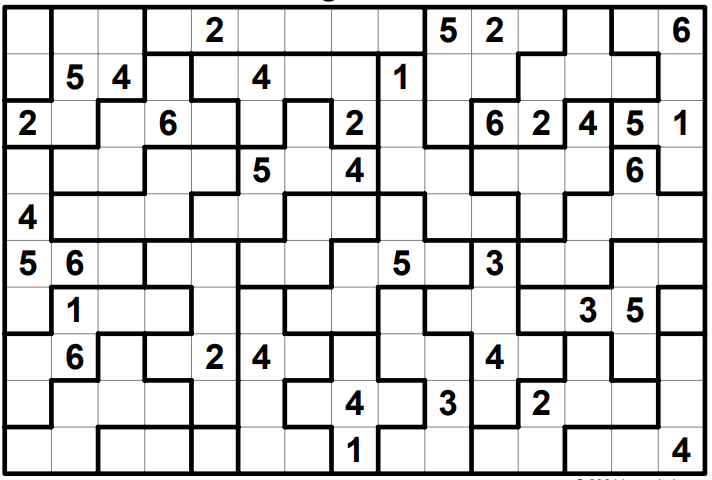

grote puzzle oplossing:
de vakjes met ? warin in het begin gevuld. 
invert the field to start
  000 001 002 003 004 005 006 007 008 009 010 011 012 013 014
a A2  B3  B1  C6  C2? C5  C1  C3  C4  D5? D2? D6  H4  I2  I6?
b A1  B5? B4? E5  F3  F4? F6  F5  G1? D3  D1  H5  H1  H3  I4 
c B2? B6  E1  E6? E2  F1  J3  F2? G6  D4  H6? H2? K4? I5? I1?
d L1  E3  E4  M3  M4  J5? J6  J4? G3  G5  K3  K5  K1  N6? I3 
e L4? M2  M1  M5  J1  J2  Q3  Q2  R6  G2  G4  K2  N3  N2  N1 
f L5? L6? L3  S4  S6  Q4  Q1  R4  R5? R1  T3? N5  N4  U6  U4 
g L2  O1? O2  O5  S1  V3  R2  R3  W2  T6  T2  U1  U3? U5? X1 
h O3  O6? P4  S3  S2? V4? V1  !5  W1  W5  T4? T5  @4  U2  #3 
i O4  P2  P5  P6  S5  V6  !3  !4? !2  W3? T1  @2? @1  @6  #1 
j P1  P3  Y1  Y2  Z1  V2  V5  !1? W6  W4  @5  @3  #5  #2  #4?

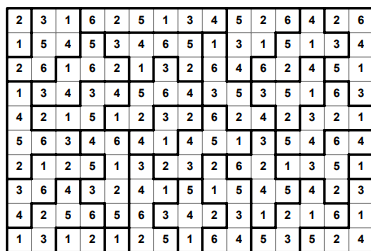

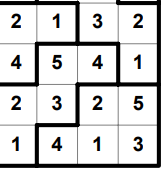

TODO:
1. inlezen kleine puzzle en renderen

2. kleine text adventure maken
including: inloggen met naam = michelle of Michelle of mies of met Kingma, en easter egg voor inloggen met lucas

3. uitprinten
4. oplossing invoeren mogelijk maken
5. oplossing checken

extra
6. bijzondere outputs toevoegen een niet spieken output maken als iemand het programma runt voor voor het weekend
Zou het mooiste zijn als ik het kon verpakken en opsturen of kan deployen (met firebase bvb)

Demo feedback:
Must haves:
-fill in feature
-note number
-or general write down
-robustere set-up

Nice-to-haves
-vakjes < helemaal
-timer voor punten
-makkelijke vakjes
-meer beloningen

Won't haves
-hints
-moeilijker maken

 extra ideas:
- vakjes met regels:
- REGENBOOG: alle getallen moeten grenzen aan vakje, geen dubbele. 12356
- OPERATOR: tussen groepen passen wiskundige operatore  zoals + - * / =. Ziet er uit als extra aanhang blokje
- !MIJNENVEGER: is een joker getal maar om blokje heen moeten getallen staan die aangeven hoeveel mijnen er om heen liggen. De mijn gaat pas af op het einde.
- SUDOKU: blokjes moeten aan sodoku regels gelden
- META: groepen tellen ook als getallen dus een 1 + 2 mogen ook niet naast een 3
- ART: Een bepaalde vorm van een groep mag nooit symmetrisch zijn met andere groepen / moet symmetrisch zijn met andere groep. Inhoud moet symetrisch / anders. handig voor generator.

Mainboard can be drawn: 
Todo * logic solution - for now, use some predefined puzzle layouts
Todo * logic unsolved - same
todo 0 maak spel shell.
TODO 1. draw broader lines to indicate cells
todo 2. draw numbers in cells


future game mode: speed
solve small puzzles to unlock more time to look and solve large puzzle
each time you get your turn at the large puzzle, the base time gets halved untill you have only one second, then you can lose.

als ik deze puzzle zelf zou maken, dan moest ik hem iets verkleinen:
bvb zo.
  000 001 002 003
a A1? A2  B3  B2
b A3  C5  C4? B1
c C2? C1  D2  D3?
d C3  D4  D5? D1

NU doen: proberen clippings output te fixen

    <defs>
        <clipPath id="border_clip">
            <rect height="500" width="500" x="0" y="0" />
        </clipPath>
    </defs>

https://github.com/donkirkby/svg-turtle/commit/537b625dc119ad9b37f1e53c161e3a4192f0378c
Weggehaald door don kirby wegens problemen met png, maar werd eerst gegenereerd met:
    
    clip_path = drawing.defs.add(drawing.clipPath(id='border_clip'))
    clip_path.add(drawing.rect(size=(width, height)))

Ik kan dit weer toevoegen op een of andere manier, maar dan moet ik eigenlijk ook weten wat het precies doet. Het weghalen netjes afmaken lijkt geen problemen te veroorzaken dus dat is nu logischer.

dan doet dit:
    def save_as(self, filename, pretty=False, indent=2):
        canvas: Canvas = self.getscreen().cv
        return canvas.to_drawing().saveas(filename, pretty, indent)

de clip path werd hier toegevoegd aan defs. Het zit te veel ingebakken in de elements dus ik voeg het nu gewoon toe.
Werkt dmv de shape Drawings uit rlg reportlab. Doet hele elegante svg dingen, veel beter dan wat ik doe. Kan wel deels in samenwerking lukken maar ik link veels te veel onnodige abstracties als ik ook gewoon rectangles kan svg'en ipv tekenen met turtle.

class methods can be useful, sort of a reverse this / self keyword:
https://pythongeeks.org/methods-in-python/

I should definetly create a board factory using this